# Árvore de decisão e Random Forest

## Árvore de decisão 89,49 %

... "Árvores de decisão são modelos estatísticos que utilizam um treinamento supervisionado para a classificação e previsão de dados. Em outras palavras, em sua construção é utilizado um conjunto de treinamento formado por entradas e saídas. Estas últimas são as classes"...

<https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF> Acesso em 23 de abril de 2022.

In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

import plotly.express as px
import pickle
import sklearn

In [8]:
  from sklearn.tree import DecisionTreeClassifier

In [9]:
with open('credit.pkl','rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [10]:
X_credit_treinamento.shape, y_credit_treinamento.shape, X_credit_teste.shape, y_credit_teste.shape, 

((24435, 20), (24435,), (8146, 20), (8146,))

In [11]:
arvore_credit = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
previsoes =arvore_credit.predict(X_credit_teste)
previsoes , y_credit_teste

(array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 0, 0, 1]))

In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
accuracy_score(y_credit_teste, previsoes)

0.8949177510434569

0.8949177510434569

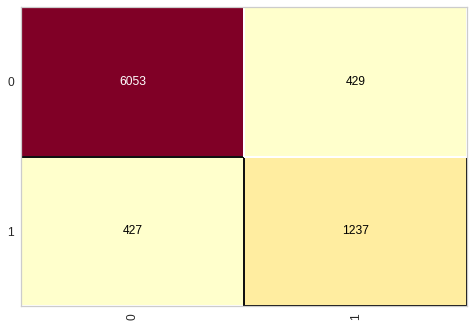

In [15]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [16]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6482
           1       0.74      0.74      0.74      1664

    accuracy                           0.89      8146
   macro avg       0.84      0.84      0.84      8146
weighted avg       0.89      0.89      0.89      8146



In [17]:
arvore_credit.feature_importances_  # Mostra a importancia de cada atributo. 

array([0.04513412, 0.16423927, 0.11113241, 0.02037139, 0.00699268,
       0.00139415, 0.05201666, 0.00427499, 0.00698415, 0.0235487 ,
       0.00687074, 0.01134628, 0.01541121, 0.08233317, 0.04613293,
       0.16895748, 0.19578232, 0.00298448, 0.00265014, 0.03144273])

In [18]:
arvore_credit.classes_

array([0, 1])

In [2]:
""" from sklearn import tree
previsores = ['person_age', 'person_income', 'person_home_ownership_1', 'person_home_ownership_2', 'person_home_ownership_3', 'person_home_ownership_4','person_emp_length',  'loan_intent_1', 'loan_intent_2',  'loan_intent_3', 'loan_intent_4', 'loan_intent_5', 'loan_intent_6', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file_1', 'cb_person_default_on_file_2', 'cb_person_cred_hist_length']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=None, class_names=['0','1'], filled=True)
#fig.savefig('arvore_credit.png') """

" from sklearn import tree\n#previsores = ['person_age', 'person_income', 'person_home_ownership_1', 'person_home_ownership_2', 'person_home_ownership_3', 'person_home_ownership_4','person_emp_length',  'loan_intent_1', 'loan_intent_2',  'loan_intent_3', 'loan_intent_4', 'loan_intent_5', 'loan_intent_6', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file_1', 'cb_person_default_on_file_2', 'cb_person_cred_hist_length']\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))\ntree.plot_tree(arvore_credit, feature_names=None, class_names=['0','1'], filled=True)\n#fig.savefig('arvore_credit.png') "

## Random Forest 93,48 %

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
random_forest_credit = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [22]:
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 1])

In [23]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.9348146329486865

0.9348146329486865

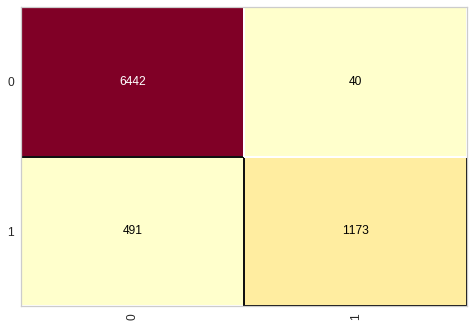

In [24]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [25]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6482
           1       0.97      0.70      0.82      1664

    accuracy                           0.93      8146
   macro avg       0.95      0.85      0.89      8146
weighted avg       0.94      0.93      0.93      8146

